---
## Random Forest: Lead Qualification

Data set imported from Salesforce. Includes high quality leads (all data is populated) that have been either qualified or disqualified.


In [1]:
import pandas as pd
import numpy as np

#import the dataset
df = pd.read_csv('./LeadQualification.csv')
print(df.columns)
                              

Index(['Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status',
       'Smoking Status', 'Status'],
      dtype='object')


### Select Data Set Metrics and Classifier

In [2]:
# Create variables for metrics and classifier so we can use this on different data sets
# Set the data we want to drop as drop_cols

# Set our classifier
classifier = 'Status'

# Set the rest of the fields as attributes
attributes = [column for column in list(df.columns) if column != classifier]
print("Classifier:",classifier)
print("Attributes",attributes)

# Set X and y
X = df[attributes]
y = df[classifier]


Classifier: Status
Attributes ['Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status', 'Smoking Status']


In [3]:
df.describe()

,Age,Height,Weight,BMI,Face Amount
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.632000,67.488000,187.960000,28.836800,198050.024000
std,7.884791,3.828198,44.789904,5.583808,154237.679316
min,52.000000,60.000000,98.000000,17.750000,10000.000000
25%,63.000000,64.000000,157.000000,25.600000,100000.000000
50%,70.000000,68.000000,180.000000,28.240000,150000.000000
75%,75.000000,70.000000,217.000000,32.480000,250000.000000
max,100.000000,78.000000,329.000000,48.580000,1000000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             125 non-null    float64
 1   Height          125 non-null    float64
 2   Weight          125 non-null    float64
 3   BMI             125 non-null    float64
 4   Face Amount     125 non-null    float64
 5   Health Status   125 non-null    object 
 6   Smoking Status  125 non-null    object 
 7   Status          125 non-null    object 
dtypes: float64(5), object(3)
memory usage: 7.9+ KB


### Category Fields
Let's convert our object fields into the category datatype.

In [5]:
#Convert object fields to category dtype

object_fields = list(df.select_dtypes('object').columns)

for field in object_fields:
    df[field] = df[field].astype('category')
    print(field+': ', df[field].unique()) # print unique values for next step

Health Status:  ['Slightly below average', 'Well below average', 'Average', 'Terminal', 'Above average']
Categories (5, object): ['Above average', 'Average', 'Slightly below average', 'Terminal', 'Well below average']
Smoking Status:  ['NonSmoker', 'Smoker']
Categories (2, object): ['NonSmoker', 'Smoker']
Status:  ['Disqualified', 'Qualified']
Categories (2, object): ['Disqualified', 'Qualified']


In [6]:
# Convert Health and Smoking Status into number values
# Specify the order for  our category fields

health = ['Terminal', 'Well below average', 'Slightly below average', 'Average', 'Above average']
smoke = ['NonSmoker', 'Smoker']
lead_status = ['Disqualified', 'Qualified']

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[health, smoke, lead_status])
ordinal.fit(df[['Health Status','Smoking Status','Status']])
df[['Health Status','Smoking Status','Status']] = ordinal.transform(df[['Health Status','Smoking Status','Status']])
df.head()

,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status,Status
0,77.0,78.0,220.0,25.42,200000.0,2.0,0.0,0.0
1,60.0,75.0,325.0,40.62,100000.0,1.0,1.0,0.0
2,59.0,75.0,275.0,34.37,200000.0,1.0,0.0,1.0
3,75.0,75.0,225.0,28.12,100000.0,3.0,0.0,0.0
4,61.0,74.0,220.0,28.24,350000.0,3.0,0.0,0.0


## Split the data into training and test portions

In [7]:
from sklearn.model_selection import train_test_split


X = df[attributes]
y = df[classifier]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #training set size = 1-test_size

In [8]:
#show metrics

X_train.head() #first 5 rows

,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status
10,61.0,72.0,280.0,37.97,100000.0,3.0,1.0
6,77.0,74.0,160.0,20.54,50000.0,1.0,1.0
122,63.0,61.0,180.0,34.01,165000.0,3.0,0.0
44,63.0,69.0,329.0,48.58,150000.0,3.0,0.0
68,73.0,67.0,160.0,25.06,500000.0,3.0,0.0


In [9]:
#show quality scores

y_train.head() #prints out first 5 rows

10     0.0
6      0.0
122    0.0
44     0.0
68     0.0
Name: Status, dtype: float64

## Training the Model

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier as rf

#Create a Gaussian Classifier with hyperparameters
clf=rf(n_estimators=100, max_features=7, random_state=6)

#View Current Parameters
print('Parameters:\n')
for param, value in clf.get_params().items():
    print('    ',param,'=',str(value)+',')


#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

Parameters:

     bootstrap = True,
     ccp_alpha = 0.0,
     class_weight = None,
     criterion = gini,
     max_depth = None,
     max_features = 7,
     max_leaf_nodes = None,
     max_samples = None,
     min_impurity_decrease = 0.0,
     min_samples_leaf = 1,
     min_samples_split = 2,
     min_weight_fraction_leaf = 0.0,
     n_estimators = 100,
     n_jobs = None,
     oob_score = False,
     random_state = 6,
     verbose = 0,
     warm_start = False,


## Evaluate the Model

In [11]:
#Import Scikit-Learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy -- how often is the classifier correct?
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')

Accuracy: 72.0%


### What Drives the Model's Decision Making Abilities?

In [12]:
#Feature importance with Pandas
#Order by importance
feature_imp = pd.Series(clf.feature_importances_, index=attributes).sort_values(ascending=True)

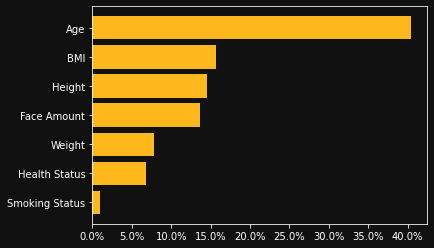

In [13]:
#Plot the data
from matplotlib import pyplot as plt, ticker as mtick

#format the graph
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#111111')
ax.patch.set_facecolor('#111111')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

#plot the data
ax.barh(feature_imp.index, feature_imp.values, color='#ffb81c')
plt.show()


### Let's Test a New Lead: Does Our Model Qualify Them?

In [14]:
# Create a new Lead to test
# Attribute Order: 'Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status', 'Smoking Status'
test_lead = {
    'Age':80,
    'Height':70,
    'Weight':250,
    'BMI':35.9,
    'Face Amount':1000000,
    'Health Status':0,
    'Smoking Status':1
}

lead_df = pd.DataFrame.from_dict([test_lead])

#lead_df[['Health Status', 'Smoking Status']] = ordinal.transform(lead_df[['Health Status', 'Smoking Status']])
predicted_score = clf.predict(lead_df)

print(lead_df.head())
print("Lead",lead_status[int(predicted_score)])

   Age  Height  Weight   BMI  Face Amount  Health Status  Smoking Status
0   80      70     250  35.9      1000000              0               1
Lead Qualified


In [15]:
# Reverse transform our category columns
#df[['Health Status', 'Smoking Status', 'Status']] = ordinal.inverse_transform(df[['Health Status', 'Smoking Status', 'Status']])

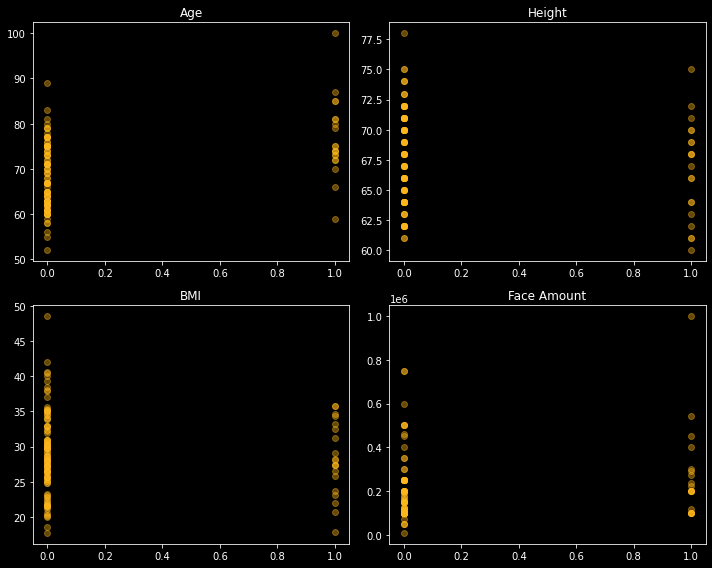

In [16]:
# Look at Attributes Individually

plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.scatter(df['Status'], df['Age'], alpha=0.4, color='#ffb81c')
plt.title('Age')

plt.subplot(2, 2, 2)
plt.scatter(df['Status'], df['Height'], alpha=0.4, color='#ffb81c')
plt.title('Height')

plt.subplot(2, 2, 3)
plt.scatter(df['Status'], df['BMI'], alpha=0.4, color='#ffb81c')
plt.title('BMI')

plt.subplot(2, 2, 4)
plt.scatter(df['Status'], df['Face Amount'], alpha=0.4, color='#ffb81c')
plt.title('Face Amount')

plt.tight_layout()
plt.show()


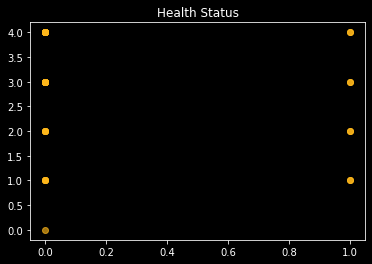

In [17]:
plt.scatter(df['Status'], df['Health Status'], alpha=0.4, color='#ffb81c')
plt.title('Health Status')
plt.show()

In [18]:
df[['Health Status', 'Smoking Status', 'Status']] = ordinal.inverse_transform(df[['Health Status', 'Smoking Status', 'Status']])

df[['Status', 'Smoking Status']].value_counts().sort_index()

Status        Smoking Status
Disqualified  NonSmoker         91
              Smoker            14
Qualified     NonSmoker         17
              Smoker             3
dtype: int64

In [19]:
df[['Status', 'Health Status']].value_counts().sort_index()

Status        Health Status         
Disqualified  Above average             28
              Average                   54
              Slightly below average    11
              Terminal                   2
              Well below average        10
Qualified     Above average              5
              Average                    5
              Slightly below average     5
              Well below average         5
dtype: int64

In [20]:
df[['Status', 'Height']].value_counts().sort_index(ascending=False)

Status        Height
Qualified     75.0       1
              72.0       1
              71.0       1
              70.0       2
              69.0       2
              68.0       3
              67.0       1
              66.0       2
              64.0       2
              63.0       1
              62.0       1
              61.0       2
              60.0       1
Disqualified  78.0       1
              75.0       2
              74.0       3
              73.0       3
              72.0       9
              71.0      10
              70.0      10
              69.0       7
              68.0       8
              67.0       7
              66.0      10
              65.0       7
              64.0      13
              63.0       4
              62.0       9
              61.0       2
dtype: int64